# DMD: estudos iniciais

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [3]:
M = io.loadmat('./input/VORTALL.mat')['VORTALL']
M

array([[-5.92220e-15, -4.68318e-15, -2.94902e-15, ..., -9.62025e-15,
        -8.86421e-15, -7.27853e-15],
       [-6.01624e-15, -4.61205e-15, -2.58238e-15, ..., -9.57891e-15,
        -8.89550e-15, -7.31406e-15],
       [-5.92116e-15, -4.68413e-15, -2.50956e-15, ..., -9.98390e-15,
        -8.95430e-15, -7.50686e-15],
       ...,
       [-1.47386e-02, -5.92327e-03, -1.69510e-03, ..., -3.54696e-02,
        -3.64824e-02, -2.84128e-02],
       [-1.36956e-02, -5.31169e-03, -1.47472e-03, ..., -4.07780e-02,
        -3.80910e-02, -2.78294e-02],
       [-1.26353e-02, -4.73980e-03, -1.27796e-03, ..., -4.49435e-02,
        -3.89362e-02, -2.69284e-02]])

In [6]:
M[:, :-1].shape

(89351, 150)

In [8]:
M[:, 1:].shape

(89351, 150)

In [7]:
# Algoritmo DMD
def DMD(X, X_shifted, r):
    # TODO: melhorar essas descrições (parte delas fiz antes de estudar corretamente)
    # Passo 1: computar a SVD de X
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    # Passo 2: truncar as matrizes para os r primeiros elementos
    # r é o posto exato ao aproximado da matriz X
    # Pode ser calculado com um algortimo (ex.: Gavish e Donoho) a partir de dados ruidosos
    # Não é o caso deste exemplo, onde é dado um posto (não sei se exato ou aproximado)
    Us = U[:, :r]
    Ss = np.diag(S[:r])
    Vts = Vt[:r, :]
    # computar a matriz Atilde
    # A matriz Atilde é a matriz aproximada do que seria a matriz A, resultante da pseudo-inversa de X
    # Contudo, o POD propõe esta aproximação feita através da projeção da matriz A na base de U, visto
    # que só interessam os r primeiros autovalores e autovetores de A
    # Ou seja, esse é o passo de calcular os modes do POD
    Atilde = Us.T @ X_shifted @ Vts @ np.linalg.inv(Ss)
    # Passo 3: computar a decomposição espectral de Atilde
    Lambda, W = np.linalg.eig(Atilde)
    Lambda = np.diag(Lambda)
    # Passo 4: computar os modos do DMD
    Phi = X_shifted @ Vts @ np.linalg.inv(Ss) @ W
    # Extra: amplitudes
    alpha1 = Ss @ Vts[:, 0]
    b = np.linalg.solve(W @ Lambda, alpha1)
    return Phi, Lambda, b
    

In [123]:
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0)
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T
    Lambda, W = np.linalg.eig(Atilde)
    Lambda = np.diag(Lambda)
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T@W
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [10]:
Phi, Lambda, b = DMD(M[:, :-1], M[:, 1:], 21)

In [13]:
print(Phi.shape)
print(Phi)

(89351, 21)
[[-5.02706031e-18+2.12267433e-17j -5.02706031e-18-2.12267433e-17j
  -5.02807463e-18-9.01035040e-17j ... -3.29653242e-18-1.70864160e-18j
   5.01296667e-18-3.97065215e-19j  5.01296667e-18+3.97065215e-19j]
 [-2.27246361e-17+4.97357467e-17j -2.27246361e-17-4.97357467e-17j
  -3.23641430e-18-1.05939326e-16j ... -2.05024841e-18-1.42843622e-18j
   6.61549577e-18+5.39971031e-19j  6.61549577e-18-5.39971031e-19j]
 [-1.16838233e-17+6.22202544e-17j -1.16838233e-17-6.22202544e-17j
  -4.13050294e-18-1.03552979e-16j ... -5.02576382e-18-1.30133957e-18j
   6.03473765e-18+1.15602346e-18j  6.03473765e-18-1.15602346e-18j]
 ...
 [-9.66701999e-05+8.33912144e-04j -9.66701999e-05-8.33912144e-04j
  -2.29139272e-04+9.00487192e-04j ... -1.00736655e-03-1.31082647e-03j
  -8.73014789e-04+1.16452527e-03j -8.73014789e-04-1.16452527e-03j]
 [ 5.25678078e-05+7.35596429e-04j  5.25678078e-05-7.35596429e-04j
  -5.71585676e-05+8.31233981e-04j ... -7.95624425e-04-1.31546836e-03j
  -6.61475101e-04+1.14842590e-03j -

In [15]:
Phi[:,1]

array([-5.02706031e-18-2.12267433e-17j, -2.27246361e-17-4.97357467e-17j,
       -1.16838233e-17-6.22202544e-17j, ...,
       -9.66701999e-05-8.33912144e-04j,  5.25678078e-05-7.35596429e-04j,
        1.71236014e-04-6.22534325e-04j])

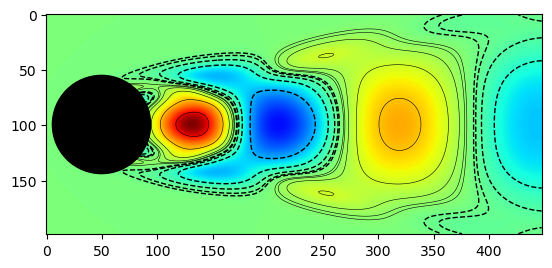

In [23]:
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(Phi[:,10],(449,199))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(49,99,5000,color='k') # draw cylinder


plt.show()

In [14]:
print(Lambda.shape)
print(Lambda)

(21, 21)
[[-0.48637901+0.87366839j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.48637901-0.87366839j  0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j        

In [47]:
(Phi @ Lambda).shape

(89351, 21)

## Visualizando um estado do sistema, puro

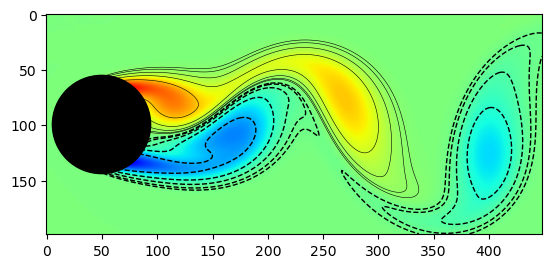

In [38]:
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(M[:,10],(449,199))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(49,99,5000,color='k') # draw cylinder


plt.show()

## Prevendo estados

### Testes

In [45]:
X, X_shifted = M[:, :-1], M[:, 1:]
X_pseudo = np.linalg.pinv(X)
A = X_shifted @ X_pseudo
# aproximar o estado 10
x = M[:, 0]
for i in range(10):
    x = A @ x

MemoryError: Unable to allocate 59.5 GiB for an array with shape (89351, 89351) and data type float64

In [68]:
from pydmd import DMD as DMDpydmd

Vou deixar o erro aqui de exemplo...

In [70]:
#np.linalg.multi_dot([self.modes, np.diag(self.eigs), pinv(self.modes), X])
# self.modes = Phi
# self.eigs = Lambda
dmd = DMDpydmd(svd_rank=21)
dmd.fit(M[:, :-1])

c:\Users\Daniel\miniconda3\lib\site-packages\pydmd\snapshots.py:72: UserWarning: Input data condition number 9533473.205670273. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [80]:
dmd.eigs

array([-0.48648368+0.87360682j, -0.48648368-0.87360682j,
       -0.29559961+0.95527787j, -0.29559961-0.95527787j,
       -0.09185771+0.99578682j, -0.09185771-0.99578682j,
        1.        +0.j        ,  0.97847831+0.20634997j,
        0.97847831-0.20634997j,  0.91483936+0.40381796j,
        0.91483936-0.40381796j,  0.81182242+0.58390445j,
        0.81182242-0.58390445j,  0.11561939+0.99330964j,
        0.11561939-0.99330964j,  0.67386173+0.73885711j,
        0.67386173-0.73885711j,  0.50689376+0.86200877j,
        0.50689376-0.86200877j,  0.31810887+0.94806009j,
        0.31810887-0.94806009j])

In [81]:
np.diag(Lambda)

array([-0.48637901+0.87366839j, -0.48637901-0.87366839j,
       -0.29552317+0.95528274j, -0.29552317-0.95528274j,
       -0.09184539+0.99577183j, -0.09184539-0.99577183j,
        0.11562118+0.99329806j,  0.11562118-0.99329806j,
        0.99999999+0.j        ,  0.97847819+0.2063499j ,
        0.97847819-0.2063499j ,  0.9148393 +0.40381774j,
        0.9148393 -0.40381774j,  0.8118224 +0.5839037j ,
        0.8118224 -0.5839037j ,  0.67386202+0.7388567j ,
        0.67386202-0.7388567j ,  0.31810679+0.94805518j,
        0.31810679-0.94805518j,  0.50689542+0.86200659j,
        0.50689542-0.86200659j])

In [87]:
Phi[1]

array([-2.27246361e-17+4.97357467e-17j, -2.27246361e-17-4.97357467e-17j,
       -3.23641430e-18-1.05939326e-16j, -3.23641430e-18+1.05939326e-16j,
        1.47938955e-17+4.17358203e-17j,  1.47938955e-17-4.17358203e-17j,
       -2.54337261e-18+1.06269150e-18j, -2.54337261e-18-1.06269150e-18j,
        1.99189584e-17+0.00000000e+00j, -2.78675252e-18+2.29347630e-17j,
       -2.78675252e-18-2.29347630e-17j, -8.65665045e-18+3.24095684e-18j,
       -8.65665045e-18-3.24095684e-18j, -3.70047489e-18-9.19923660e-19j,
       -3.70047489e-18+9.19923660e-19j,  7.88167016e-18-3.10022624e-18j,
        7.88167016e-18+3.10022624e-18j, -2.05024841e-18+1.42843622e-18j,
       -2.05024841e-18-1.42843622e-18j,  6.61549577e-18+5.39971031e-19j,
        6.61549577e-18-5.39971031e-19j])

In [91]:
print(dmd.modes.shape, np.diag(dmd.eigs).shape, np.linalg.pinv(dmd.modes).shape, M[:, :-1].shape)

(89351, 21) (21, 21) (21, 89351) (89351, 150)


In [92]:
print(Phi.shape, Lambda.shape, np.linalg.pinv(Phi).shape, M[:, :-1].shape)

(89351, 21) (21, 21) (21, 89351) (89351, 150)


In [90]:
X = M[:, :-1]
np.linalg.multi_dot(
            [dmd.modes, np.diag(dmd.eigs), np.linalg.pinv(dmd.modes), X]
        ).shape

(89351, 150)

In [129]:
X = M[:, :-1]
X.shape

(89351, 150)

In [93]:
np.linalg.multi_dot([Phi, Lambda, np.linalg.pinv(Phi), X]).shape

(89351, 150)

### Pra valer

In [94]:
predict = np.linalg.multi_dot([Phi, Lambda, np.linalg.pinv(Phi), X])

In [100]:
I = predict

In [119]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming I is defined and contains the dynamical system state

def update_frame(frame):
    plt.clf()
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(I[:, frame], (449, 199))))
    V2 = V2.T

    # Normalize values... not symmetric
    minval = np.min(V2)
    maxval = np.max(V2)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2, cmap='jet', vmin=vortmin, vmax=vortmax)

    cvals = np.array([-4, -2, -1, -0.5, -0.25, -0.155])
    plt.contour(V2, cvals * vortmax / 5, colors='k', linestyles='dashed', linewidths=1)
    plt.contour(V2, np.flip(-cvals) * vortmax / 5, colors='k', linestyles='solid', linewidths=0.4)

    plt.scatter(49, 99, 5000, color='k')  # draw cylinder

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the animation
ani = FuncAnimation(fig, update_frame, frames=range(0, I.shape[1]), interval=50)

# save animation to mp4
ani.save('animation.mp4', writer='ffmpeg', fps=30)

<IPython.core.display.Javascript object>

In [122]:
from IPython.display import HTML
# Load animation.mp4 and show it
HTML('<video src="animation.mp4" controls loop>')

TODO: comparar

TODO: exemplo mais simples dos tutoriais - são interessantes porque o sistema é reconstruído exatamente, o que não é o caso aqui
(afinal noisy data)

TODO: construir classe para o DMD